In [18]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

In [2]:
boston = load_boston()
X=boston["data"]
y=boston["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3]:
weights=np.array([0.9]*X_train.shape[0])

In [4]:
def predict(decision_trees, weights, X):
    return [sum([weight * tree.predict([sample])[0] for tree, weight in zip(decision_trees, weights)]) for sample in X]

In [5]:
def fit(weights, X, y):
    anti_grad =  np.copy(y)
    decision_trees=[]
    for i in range(50):
        tree = DecisionTreeRegressor(max_depth=5, random_state=42)
        tree.fit(X, anti_grad)
        decision_trees.append(tree)
        y_predicted = predict(decision_trees, weights, X)
        anti_grad = np.array([-(y_predicted[j]-y[j]) for j in range(len(X))])
    return decision_trees

In [6]:
decision_trees=fit(weights, X_train, y_train)

In [7]:
np.power(mean_squared_error(y_true=y_test, y_pred=predict(decision_trees, weights, X_test)), 0.5)

3.6847237271745468

In [8]:
weights2=np.array([0.9 / (1.0 + i) for i in range(50)])

In [9]:
decision_trees2=fit(weights2, X_train, y_train)

In [10]:
np.power(mean_squared_error(y_true=y_test, y_pred=predict(decision_trees2, weights2, X_test)), 0.5)

2.9887754660377452

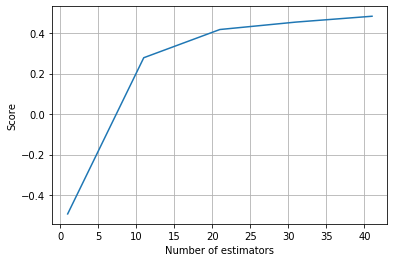

In [11]:
tree_sizes = range(1, 51, 10)
tree_max_depths = range(1, 100, 5)
scores = []
for tree_size in tree_sizes:
    estimator = GradientBoostingRegressor(max_depth=5, n_estimators=tree_size)
    score = cross_val_score(estimator, X, y, cv = 3)    
    scores.append(score)
scores = np.asmatrix(scores)
plt.figure()
plt.plot(tree_sizes, scores.mean(axis = 1))
plt.grid(True)
plt.xlabel('Number of estimators')
plt.ylabel('Score')
plt.show()

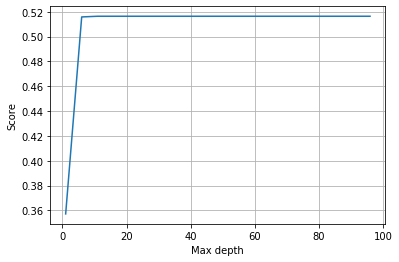

In [12]:
scores = []
for max_depth in tree_max_depths:
    estimator = GradientBoostingRegressor(max_depth=max_depth, n_estimators=30, min_weight_fraction_leaf=0.1)
    score = cross_val_score(estimator, X, y, cv = 3)    
    scores.append(score)
scores = np.asmatrix(scores)
plt.figure()
plt.plot(tree_max_depths, scores.mean(axis = 1))
plt.grid(True)
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.show()

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
np.power(mean_squared_error(y_true=y_test, y_pred=lr.predict(X_test)), 0.5)

4.700924890603784

In [22]:
def plot_learning_curves(X_train, y_train, max_depth, n_estimators):
    estimator = GradientBoostingRegressor(max_depth=max_depth, n_estimators=n_estimators, min_weight_fraction_leaf=0.1)
    train_sz, train_errs, cv_errs = learning_curve(estimator=estimator, X=X_train, y=y_train.flatten(), cv=8,
                                                  train_sizes=np.linspace(0.15, 1, 20),
                                                  scoring="neg_mean_squared_error")  
    tr_err = np.mean(train_errs, axis=1)
    cv_err = np.mean(cv_errs, axis=1)
    fig, ax = plt.subplots()
    ax.plot(train_sz, tr_err, linestyle="--", color="r", label="training error")
    ax.plot(train_sz, cv_err, linestyle="-", color="b", label="cv error")
    ax.legend(loc="lower right")

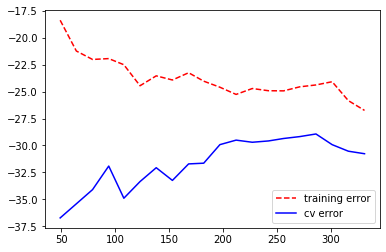

In [23]:
plot_learning_curves(X_train, y_train, 5, 10)

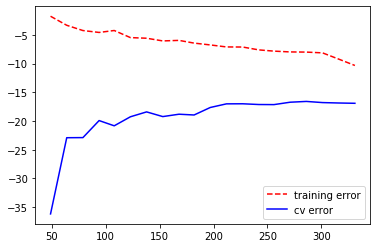

In [24]:
plot_learning_curves(X_train, y_train, 5, 40)

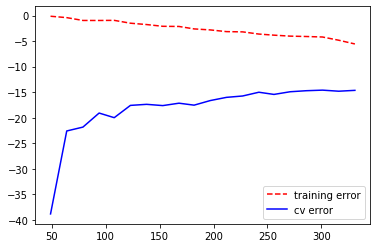

In [25]:
plot_learning_curves(X_train, y_train, 5, 100)